In [1]:
%matplotlib inline
import numpy as np
import sklearn.cluster
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
# Generate a random data matrix. n = number of data points; m = length of each data point; num_types = number of types
def gen_data(n, m, num_types):
    # type for each data point (each from 0 to n-1)
    types = np.trunc(np.random.random_sample(n)*num_types)
    # list of random vectors of m integers between 20 and 40, to serve as the mean for each type
    means = [np.random.randint(20,40,m) for t in range(num_types)]
    # list of vectors of standard deviations for each type
    stddevs = 2 * np.ones([num_types,m])
    # generate a data matrix and round to the nearest thousandth
    return np.round(map(lambda t : list(np.random.randn(len(means[t])) * stddevs[t] + means[t]), map(int, types)),3)

In [3]:
# run k-means clustering on M, for each k values in k_vals
def k_mean_test(M, k_vals):
    results = []
    for k in k_vals:
        fit = sklearn.cluster.KMeans(n_clusters=k).fit(M)
        var = sum(np.var(M,0))*len(M)
        within_var = sum(map(lambda r : min(r)**2, fit.transform(M)))
        results.append((k, within_var/var))
    return results

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], [1.0000000000000011, 0.51154732813979809, 0.19408891355529098, 0.15619756541756322, 0.11971759502286615, 0.11174017859031837, 0.10529108565221205, 0.097598830588982055, 0.092503441497220479, 0.089055187194338553, 0.084778478511307265, 0.079611540202044168, 0.075923013382734425, 0.070361137334617366, 0.068324068842415986, 0.065801434523493602, 0.06415863981112957, 0.061751950923499124, 0.059854068396731831, 0.057416355763832687, 0.055035108398676334, 0.05320508957721936, 0.052604354583503737, 0.050227007802491751, 0.04907326826272216, 0.047563134870563996, 0.046424748455049687, 0.045055648748482224, 0.043962609904476098, 0.041829751795093691, 0.042222723297754228, 0.040015300434596758, 0.03998271884643198, 0.038219180856371299, 0.037842346898096027, 0.036427334713343099, 0.036288263059235361, 0.0

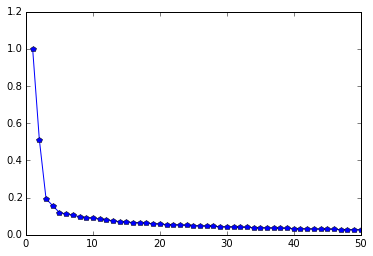

In [4]:
# generate 200 data points in R^4, with 5 topics
M = gen_data(200, 4, 5)
# plot results for k=1 to 10
plot_results = map(list, zip(*k_mean_test(M, range(1,51))))
print plot_results
plt.plot(plot_results[0], plot_results[1], 'p-')